In [2]:

#Данные из https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


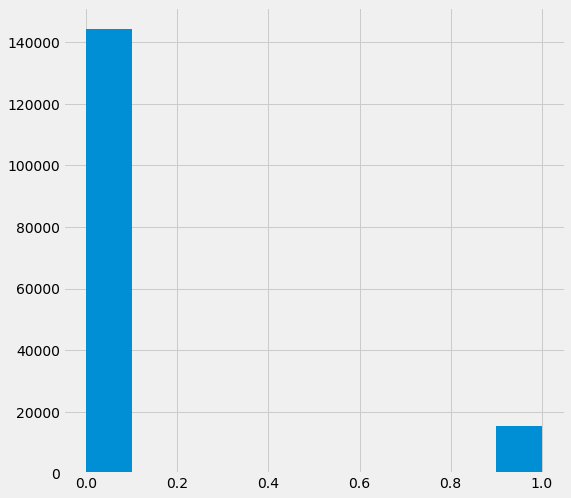

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

train['toxic'].hist();

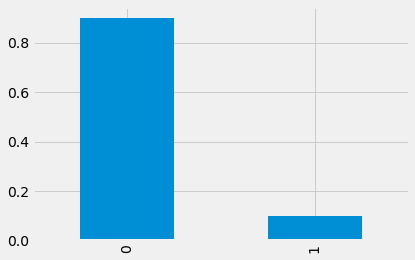

In [5]:
train['toxic'].value_counts(normalize = True).round(2).plot(kind = 'bar')

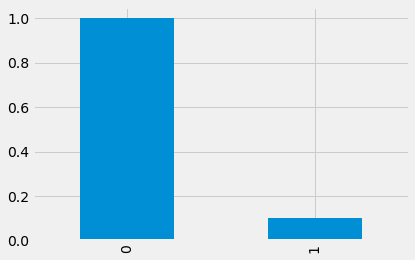

In [6]:
for i in train.columns.to_list()[2:]:
    train[i].value_counts(normalize = True).round(2).plot(kind = 'bar')

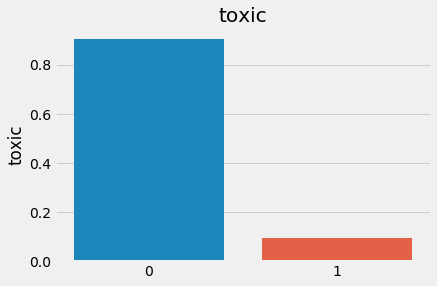

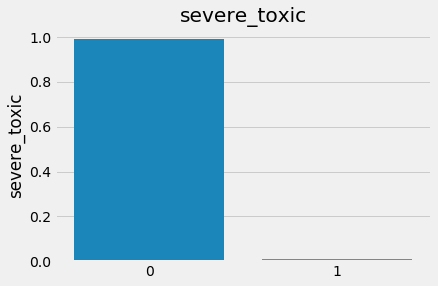

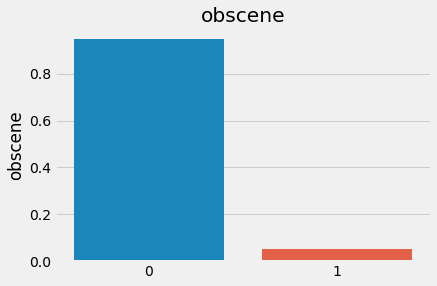

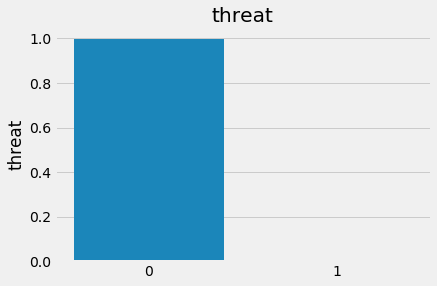

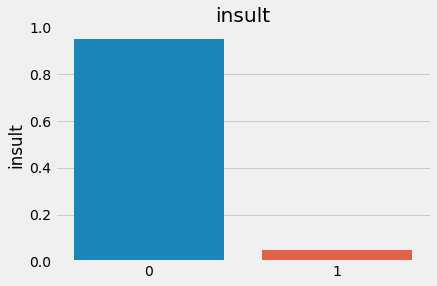

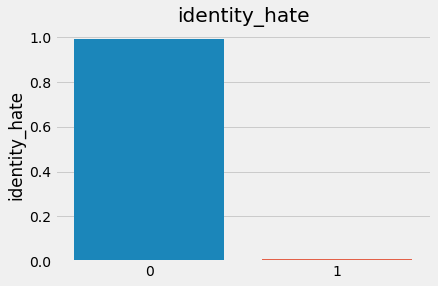

In [7]:
l = []
cols = train.columns.to_list()[2:]

for i in cols:
    l.append(pd.DataFrame(train[i].value_counts(normalize = True)))

for i in range(6):     
    sns.barplot(x = l[i].index, y = l[i][l[i].columns[0]], data = l[i])
    plt.title(l[i].columns[0])
    plt.show();

In [8]:
train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.01,0.10,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.05,0.22,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.00,0.05,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.05,0.22,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.01,0.09,0.0,0.0,0.0,0.0,1.0


In [9]:
train.isnull().mean()

id               0.0
comment_text     0.0
toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64

In [10]:
train[cols].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [11]:
train['len'] = train['comment_text'].apply(lambda x: len(str(x)))
train.tail(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,189


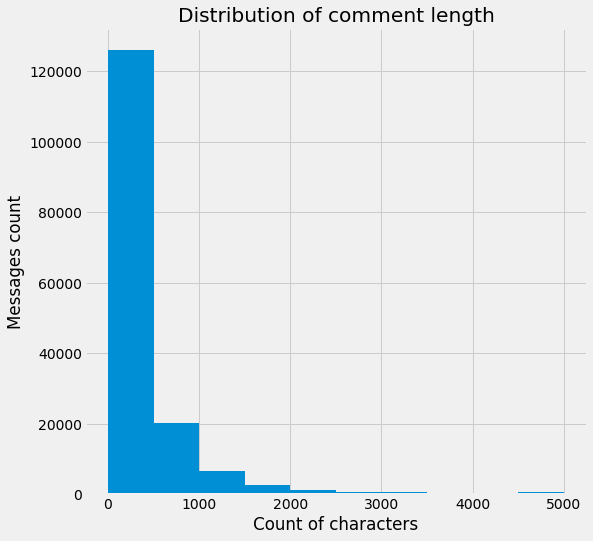

In [12]:
plt.figure(figsize=(8,8))

train['len'].hist()
plt.xlabel('Count of characters')
plt.ylabel('Messages count')
plt.title('Distribution of comment length');

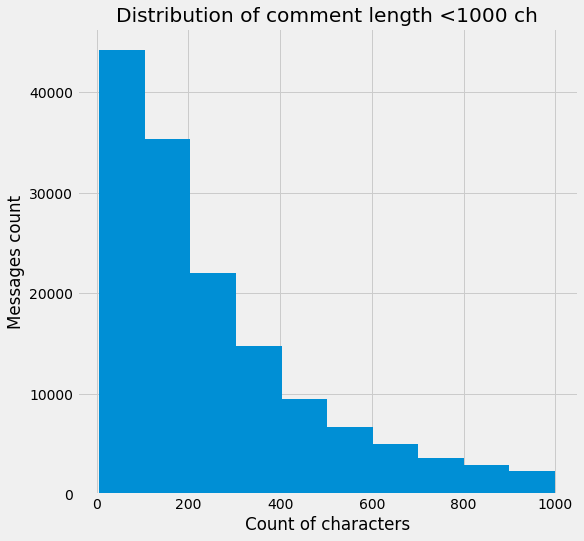

In [13]:
plt.figure(figsize=(8,8))

train[train['len'] < 1000]['len'].hist()
plt.xlabel('Count of characters')
plt.ylabel('Messages count')
plt.title('Distribution of comment length <1000 ch');

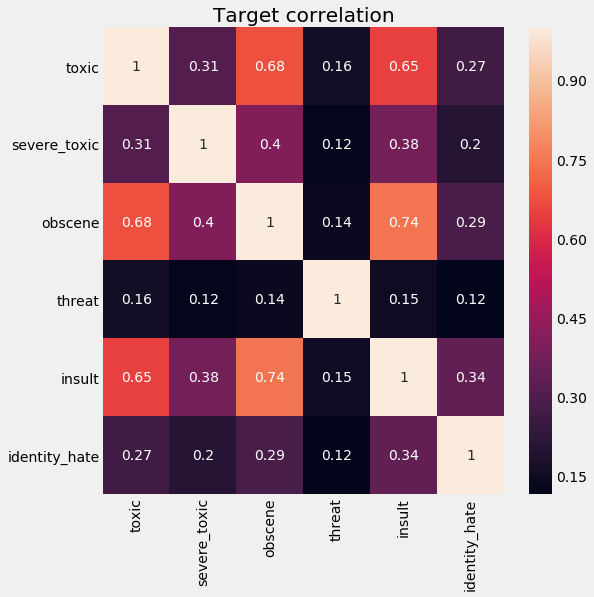

In [14]:
plt.figure(figsize=(8,8))

sns.heatmap(train[cols].corr(), annot = True)
plt.title('Target correlation');

## Предобработка данных

In [15]:
for i in cols:
    print(len(train[i]))

159571
159571
159571
159571
159571
159571


In [16]:
temp = train[train[list(x for x in train.columns)[2:-1]].any(axis = 1) == 1]
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,16225.0,0.942619,0.232576,0.0,1.0,1.0,1.0,1.0
severe_toxic,16225.0,0.098305,0.297736,0.0,0.0,0.0,0.0,1.0
obscene,16225.0,0.520740,0.499585,0.0,0.0,1.0,1.0,1.0
threat,16225.0,0.029461,0.169099,0.0,0.0,0.0,0.0,1.0
insult,16225.0,0.485485,0.499805,0.0,0.0,0.0,1.0,1.0
identity_hate,16225.0,0.086595,0.281249,0.0,0.0,0.0,0.0,1.0
len,16225.0,303.304037,619.402896,8.0,61.0,128.0,283.0,5000.0


In [17]:
mask = train[list(x for x in train.columns)[2:-1]].any(axis = 1) == 0

train[mask].describe().T #.shape

,count,mean,std,min,25%,50%,75%,max
toxic,143346.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
severe_toxic,143346.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
obscene,143346.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
threat,143346.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
insult,143346.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
identity_hate,143346.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
len,143346.0,404.347174,586.503447,6.0,102.0,216.0,452.0,5000.0


In [18]:
mask = train['len'] <= np.quantile(train['len'], .95)

train[mask].describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,151593.0,0.097577,0.296743,0.0,0.0,0.0,0.0,1.0
severe_toxic,151593.0,0.009651,0.097764,0.0,0.0,0.0,0.0,1.0
obscene,151593.0,0.053875,0.225771,0.0,0.0,0.0,0.0,1.0
threat,151593.0,0.003041,0.055062,0.0,0.0,0.0,0.0,1.0
insult,151593.0,0.050405,0.218779,0.0,0.0,0.0,0.0,1.0
identity_hate,151593.0,0.008938,0.094120,0.0,0.0,0.0,0.0,1.0
len,151593.0,286.092531,272.477390,6.0,91.0,191.0,382.0,1355.0


In [19]:
def text_cleaner(text):
    text = text.lower() #приводим все к нижнему регистру
    text = text.replace('what\'s','what is')
    text = text.replace('\'s',' ')
    text = text.replace('i\'m','i am')
    text = text.replace('\'ve',' have')
    text = text.replace('can\'t','cannot')
    text = text.replace('n\'t',' not')
    text = text.replace('\'re',' are')
    text = text.replace('\'d',' would')
    text = text.replace('\'ll',' will')
    text = text.replace('\'scuse',' excuse')
    text = text.replace('\n',' ')
    text = text.replace('\'t',' ')
    text = text.replace('\'w',' ')
    text = text.replace('\'s+',' ')
    text = text.replace('"',' ')
    text = text.replace('\'',' ')
    text = text.strip(' ') #удаляем пробелы в начале и в конце предложения
    return text

In [20]:
train['comment_text'] = train['comment_text'].apply(text_cleaner)

In [21]:
#смотрю на данные
train.iloc[5:10,]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
5,00025465d4725e87,"congratulations from me as well, use the tools...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,44
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,sorry if the word nonsense was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [22]:
#еще подробнее
train.loc[152622,'comment_text']

'reply hi, thanks for the email. i assume it  the article above to which you refer. i deleted your article because it did not provide independent verifiable sources to enable us to verify the facts or show that it meets the notability guidelines. it is also now wikipedia policy that biographical articles about living people must have independent verifiable references. as a matter of policy, all biographies of living people will be deleted if they do not have references. although you gave references, one was to a commercial sales site, which is spammy, one was your own site, and the other was an anonymous review by an unknown editor.  articles must be neutral and encyclopaedic. this seemed to be intended to promote your autobiography. you have an obvious conflict of interest when it comes to editing articles about this subject. thank you for declaring your interest - your honesty in this matter is appreciated. if, after reading the information about notability linked above, you still be

## Векторизация данных

In [24]:
from sklearn.model_selection import train_test_split

X = train['comment_text']
y = train[cols]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) #, stratify = y)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
max_len = train['len'].max()

vect = TfidfVectorizer(max_features = max_len, stop_words = 'english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [27]:
X_train = vect.fit_transform(X_train)

X_train

<111699x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2222270 stored elements in Compressed Sparse Row format>

In [28]:
X_test = vect.fit_transform(X_test)

X_test

<47872x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 957540 stored elements in Compressed Sparse Row format>

## Построение простых моделек

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
logreg = LogisticRegression(C = 12.0)

for i in cols:
    print('... processing {}'.format(i))
    y = y_train[i]
    logreg.fit(X_train, y)
    y_pred_proba_X = logreg.predict_proba(X_test)
    y_pred_X = logreg.predict(X_test)
    print('Test roc-auc is {}'.format(roc_auc_score(y_test[i], y_pred_proba_X[:,1]))), \
    print('Test accuracy is {}'.format(accuracy_score(y_test[i], y_pred_X)))

... processing toxic
Test roc-auc is 0.609419107816041
Test accuracy is 0.886990307486631
... processing severe_toxic
Test roc-auc is 0.5631496073537389
Test accuracy is 0.989221256684492
... processing obscene
Test roc-auc is 0.5937408402412061
Test accuracy is 0.9401529077540107
... processing threat
Test roc-auc is 0.5997157101886481
Test accuracy is 0.9970755347593583
... processing insult
Test roc-auc is 0.5461444533221718
Test accuracy is 0.9473178475935828
... processing identity_hate
Test roc-auc is 0.6453191292411801
Test accuracy is 0.990975935828877


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

for i in cols:
    print('... processing {}'.format(i))
    y = y_train[i]
    rf.fit(X_train, y)
    y_pred_proba_X = rf.predict_proba(X_test)
    y_pred_X = rf.predict(X_test)
    print('Training roc-auc is {}'.format(roc_auc_score(y_test[i], y_pred_proba_X[0:,1]))), \
    print('Test accuracy is {}'.format(accuracy_score(y_test[i], y_pred_X)))

... processing toxic
Training roc-auc is 0.5482669353169483
Test accuracy is 0.8229445187165776
... processing severe_toxic
Training roc-auc is 0.6393815351007139
Test accuracy is 0.9875919117647058
... processing obscene
Training roc-auc is 0.5948749086240741
Test accuracy is 0.9108246991978609
... processing threat
Training roc-auc is 0.4981853696481042
Test accuracy is 0.99688753342246
... processing insult
Training roc-auc is 0.5642942128967009
Test accuracy is 0.9215616644385026
... processing identity_hate


In [ ]:
def r_g_c(g1, g2):
    if g1 == g2:
        return 'IMPOSSIBLE'
    else:
        return 'acceptably'
    
r_g_c(input(),input())

In [51]:
#прогон на трейне


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

for i in cols:
    print('... processing {}'.format(i))
    y = train[i]
    rf.fit(X_t, y)
    y_pred_X = rf.predict_proba(X_t)
    print('Training roc-auc is {}'.format(roc_auc_score(y, y_pred_X[0:,1])))
    

... processing toxic
Training roc-auc is 0.9993078468788525
... processing severe_toxic
Training roc-auc is 0.9995448636061222
... processing obscene
Training roc-auc is 0.9994419013307191
... processing threat
Training roc-auc is 0.9999101141520681
... processing insult
Training roc-auc is 0.9991254531225482
... processing identity_hate
Training roc-auc is 0.9996178212331807


In [90]:
#прогон с CV

from sklearn.model_selection import RandomizedSearchCV
logreg = LogisticRegression()
lr_params={'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}

lr_grid = RandomizedSearchCV(logreg, param_distributions=lr_params, cv = 5, n_iter = 10, n_jobs = 6, scoring = 'roc_auc', verbose=True)

for i in cols:
    print('... processing {}'.format(i))
    y = train[i]
    lr_grid.fit(X_t, y)
    y_pred_X = lr_grid.predict_proba(X_t)
    print('Training roc-auc is {}'.format(roc_auc_score(y, y_pred_X[0:,1])))

... processing toxic
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   26.8s finished


Training roc-auc is 0.9732608547157063
... processing severe_toxic
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   33.1s finished


Training roc-auc is 0.9897544871305399
... processing obscene
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   28.5s finished


Training roc-auc is 0.9876608681349222
... processing threat
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   48.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   52.4s finished


Training roc-auc is 0.9926130151972635
... processing insult
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   26.5s finished


Training roc-auc is 0.9721083501157615
... processing identity_hate
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   31.3s finished


Training roc-auc is 0.984536699876066


In [41]:
logreg = LogisticRegression()
lr_params= {'C':[12.0,15.0,20.0], 'penalty':['l1'], 'solver': [ 'liblinear', 'saga']}
        #{'C':np.logspace(-3,3,7), 'penalty':['l2'], 'solver': ['newton-cg',  'lbfgs', 'sag']},
          

lr_grid = RandomizedSearchCV(logreg, param_distributions=lr_params, cv = 5, n_iter = 10, n_jobs = 6, scoring = 'roc_auc', verbose=True)

for i in cols:
    print('... processing {}'.format(i))
    y = y_train[i]
    lr_grid.fit(X_train, y)
    y_pred_proba_X = lr_grid.predict_proba(X_test)
    y_pred_X = lr_grid.predict(X_test)
    print('Test roc-auc is {}'.format(roc_auc_score(y_test[i], y_pred_proba_X[:,1]))), \
    print('Test accuracy is {}'.format(accuracy_score(y_test[i], y_pred_X)))

... processing toxic
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed: 10.1min finished


Test roc-auc is 0.6215725951537878
Test accuracy is 0.8827080548128342
... processing severe_toxic
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  5.0min finished
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iteratio

Test roc-auc is 0.5584851819151186
Test accuracy is 0.9882603609625669
... processing obscene
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  9.3min finished


Test roc-auc is 0.5879360938369207
Test accuracy is 0.9348679812834224
... processing threat
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  2.9min finished
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iteratio

Test roc-auc is 0.5652994432309968
Test accuracy is 0.9969919786096256
... processing insult
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  9.9min finished


Test roc-auc is 0.5546898846268881
Test accuracy is 0.9445396056149733
... processing identity_hate
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  5.9min finished


Test roc-auc is 0.6466460003109414
Test accuracy is 0.9891377005347594


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
